# Task-1

# TITANIC SURVIVAL PREDICTION

**Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.**
**The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.** 

In [153]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Load Data

In [154]:
titanic=pd.read_csv('../CODSOFT/tested.csv')
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
119,1011,1,2,"Chapman, Mrs. John Henry (Sara Elizabeth Lawry)",female,29.0,1,0,SC/AH 29037,26.0000,NaN,S
265,1157,0,3,"Lyntakoff, Mr. Stanko",male,NaN,0,0,349235,7.8958,NaN,S
252,1144,0,1,"Clark, Mr. Walter Miller",male,27.0,1,0,13508,136.7792,C89,C
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
313,1205,1,3,"Carr, Miss. Jeannie",female,37.0,0,0,368364,7.7500,NaN,Q
231,1123,1,1,"Willard, Miss. Constance",female,21.0,0,0,113795,26.5500,NaN,S
186,1078,1,2,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S
239,1131,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C86,C
328,1220,0,2,"Clarke, Mr. Charles Valentine",male,29.0,1,0,2003,26.0000,NaN,S
233,1125,0,3,"Linehan, Mr. Michael",male,NaN,0,0,330971,7.8792,NaN,Q


In [155]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [156]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Observation:
1. All the dtypes of every attribute is correct.
2. Their is missing values in `Age`,`Fare` and `Cabin` column.
3. Most important this data is test dataset of `Titanic` so the `survived` column is relate to `Sex` column.Where Male=(0),and Female=(1). 

## Data Cleaning

### Handling missing values

In Data-cleaning we see,
1. If Missing values percantage is `>50%` we remove this column.
2. If Missing values percentage is `<5%` we impute this column,or sometimes `<25%` can considered. 

In [157]:
titanic.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

* As i say above `Age`,`Fare` missing values is <25%,and `Cabin` column has >50% of missing values so we remove this.
* And also removed irrelevent columns which we don't need.

In [158]:
titanic.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


As in imputing stage we can care about,
* Check the distribution of column if its normal distribution then fill with `Mean` and if skewed distribution of column fill with `Median`.
  

In [159]:
median_age=titanic['Age'].median()
t_median=titanic['Age_median']=titanic['Age'].fillna(median_age)

mean_age=titanic['Age'].mean()
t_mean=titanic['Age_mean']=titanic['Age'].fillna(mean_age)

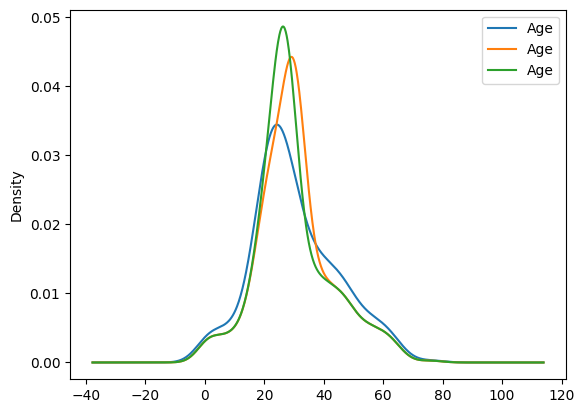

In [160]:
plt.figure()
ax=plt.subplot(1,1,1)
titanic['Age'].plot(kind='kde',ax=ax)

t_mean.plot(kind='kde',ax=ax)
t_median.plot(kind='kde',ax=ax)

ax.legend()


* We see that the `median` distribution is less than `mean` so we impute with median.

In [161]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True)


* Lets impute `Fare column`

In [162]:
titanic['Fare'].fillna(titanic['Fare'].median(),inplace=True)


In [163]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_median     0
Age_mean       0
dtype: int64

* Lets drop column which we make to predict which method is best for filling.

In [164]:
titanic.drop(['Age_median','Age_mean'],axis=1,inplace=True)

* Checking outliers

<Axes: xlabel='Parch'>

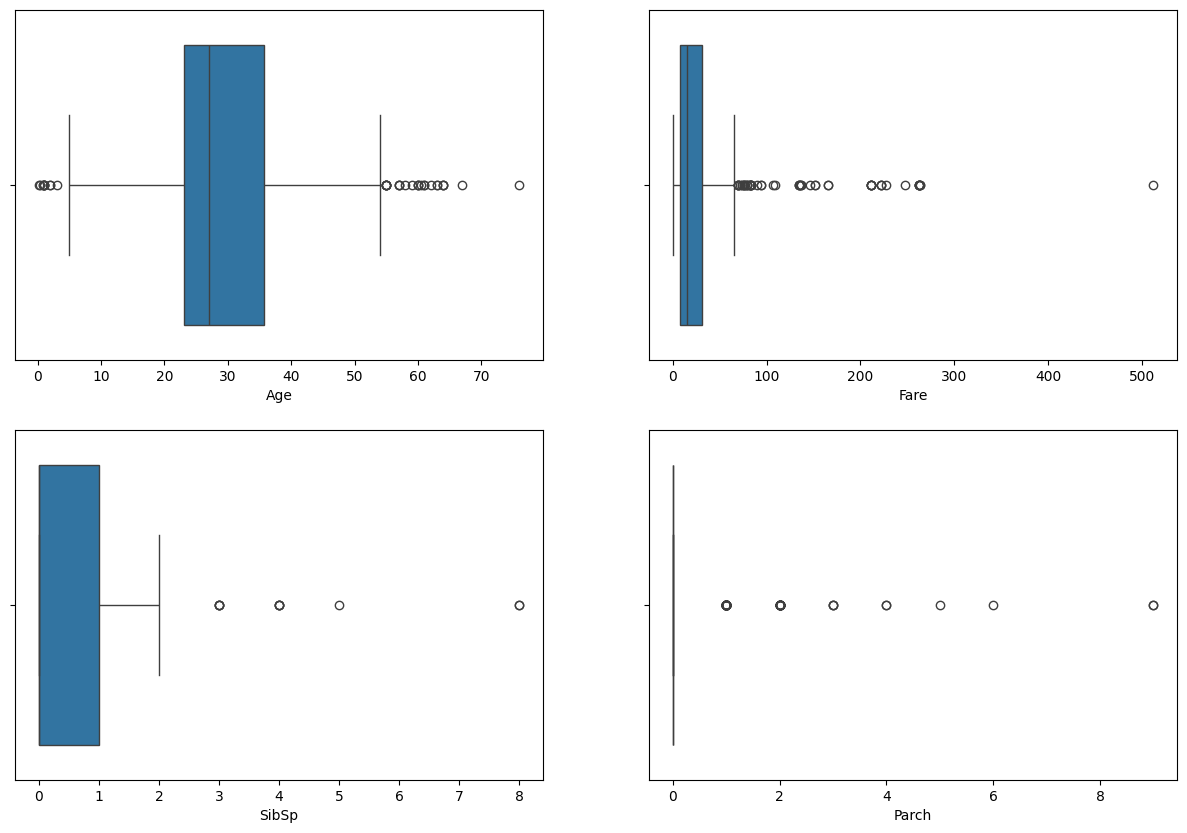

In [165]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot boxplots for each column
sns.boxplot(ax=axes[0], data=titanic, x='Age')
sns.boxplot(ax=axes[1], data=titanic, x='Fare')
sns.boxplot(ax=axes[2], data=titanic, x='SibSp')
sns.boxplot(ax=axes[3], data=titanic, x='Parch')

<Axes: xlabel='Age', ylabel='Fare'>

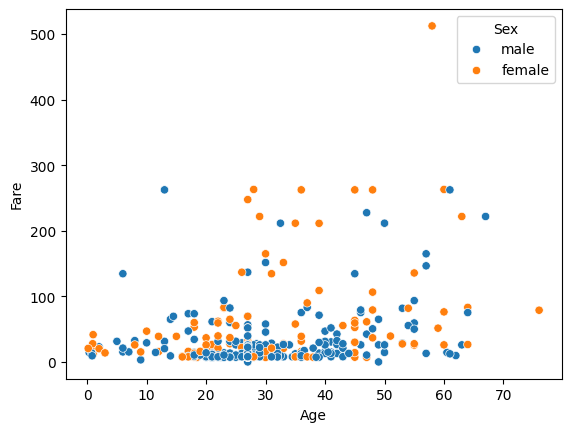

In [166]:
# Making a plot to visulize weather a outlier is lies or not.

sns.scatterplot(titanic,x='Age',y='Fare',hue='Sex')

In [167]:
titanic[(titanic['Age']>70)|(titanic['Fare']>500)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,988,1,1,female,76.0,1,0,78.8500,S
343,1235,1,1,female,58.0,0,1,512.3292,C


* We see that `76 age` is a valid age so this is not a outlier.
* The `Fare` price has possibilites that the person had booked the ticket in last minutes etc.

* Lets check `SibSp` and `Parch` column.

<Axes: xlabel='SibSp', ylabel='Parch'>

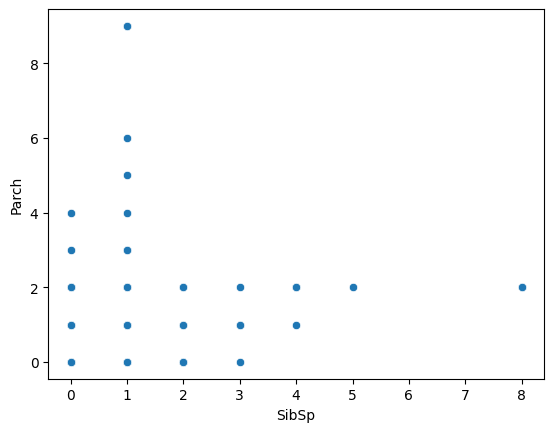

In [168]:
sns.scatterplot(titanic,x='SibSp',y='Parch')

In [169]:
titanic[(titanic['SibSp']>8)| (titanic['Parch']>8)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
342,1234,0,3,male,27.0,1,9,69.55,S
365,1257,1,3,female,27.0,1,9,69.55,S


* So this is also not an outliers,we see there is a some relation between them.

**Done**

## Data Analysis/Visulization

**Hypothesis**
1. Check the percentage b/w male and female.
2. Check which Age group of people are more in ship.
3. Check highest no of people are travelling from which city and least no people are travelling from which city.
4. Check distribution between Pclass and Age.

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


* Lets check the percentage between `male` and `Female` who no is higher in this ship.

In [ ]:
male_count=titanic['Sex'].value_counts()['male']/len(titanic)*100
female_count=titanic['Sex'].value_counts()['female']/len(titanic)*100

print('Male percentage:',male_count)
print('Female percentage:',female_count)

Male percentage: 63.63636363636363
Female percentage: 36.36363636363637


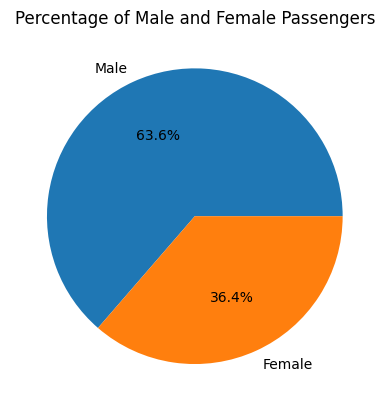

In [ ]:
fig, ax = plt.subplots()
ax.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%')
ax.set_title('Percentage of Male and Female Passengers')
plt.show()

* Here we see the the percentage of `male` has more than `female`

* Check which Age group of people are more in ship.

**We make binnig for `Age` column for better understanding.**

In [ ]:
bins=[0,1,5,12,18,30,50,80]
label=['Infants','Toddles','Child','Teen','Adult','Younger','Middle_aged']

titanic['Binned_age']=pd.cut(titanic['Age'],bins=bins,labels=label)

In [ ]:
titanic['Binned_age'].value_counts()

Binned_age
Adult          232
Younger        101
Middle_aged     31
Teen            29
Child           13
Infants          8
Toddles          4
Name: count, dtype: int64

<Axes: xlabel='Binned_age', ylabel='Count'>

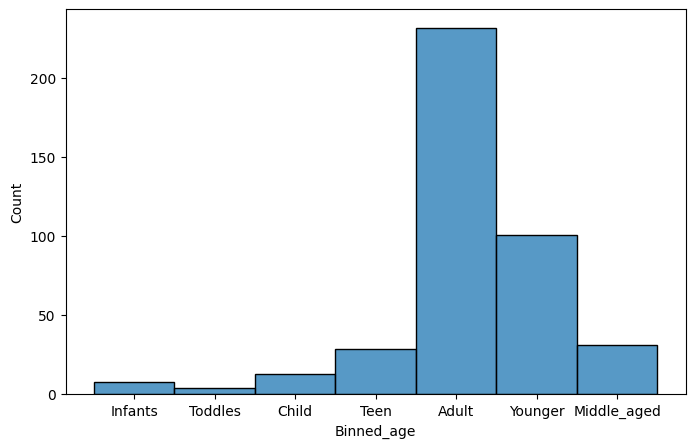

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(titanic,x='Binned_age')

* Now we see the advantage of making bins,also we see `Adult` group are highest no.

* Check highest no people are travelling from which city and least no people are travelling from which city.

In [ ]:
embark=titanic['Embarked'].value_counts()

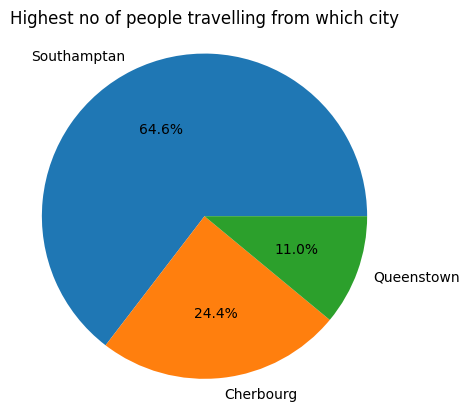

In [ ]:

fig,ax = plt.subplots()
ax.pie(embark, labels=['Southamptan','Cherbourg','Queenstown'], autopct='%1.1f%%',radius=1.1)
ax.set_title('Highest no of people travelling from which city')
plt.show()

* The highest no people travelling from `Southampton` City.
* least no of people are from Queenstown.

In [192]:
titanic.groupby('Pclass')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,39.747664,13.903877,6.00,27.00,39.0,50.0,76.0
2,93.0,28.681935,12.593273,0.92,21.00,27.0,34.0,63.0
3,218.0,25.009541,8.726613,0.17,21.25,27.0,27.0,60.5


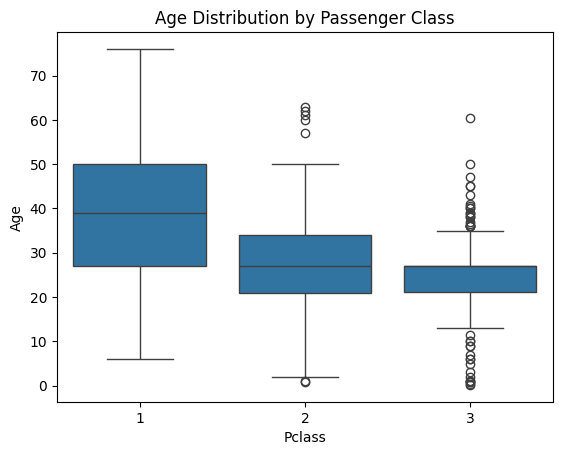

In [193]:
sns.boxplot(titanic,x='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class')
plt.show()

# Making ML model

In [ ]:

# Select relevant features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Extract the selected features and the target variable
X = titanic[features]
y = titanic['Survived']

In [ ]:

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [ ]:
#Build and Evaluate the Model
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


c:\Users\USER\miniconda3\envs\EDA_env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
